## Bias-Variance Trade-Off in Machine Learning
### Bias
**In statistics, the bias is the difference between the estimator’s expected prediction and the true values that the estimator aims to predict. High bias represents that the estimator cannot accurately capture the correlation between input features and the true output, which leads to the problem of underfitting.**
### Variance
**Variance, on the other hand, represents the variability of the estimator in terms of prediction. An estimator with high variance is very sensitive to small perturbations of input features, which causes the overfitting problem.**
**In general, we can reduce the bias by increasing the model complexity (e.g., adding more learnable parameters); however, higher model complexity might cause the overfitting issue of the model (i.e., high variance), which results in a tension in terms of simultaneously minimizing both bias and variance.** 

Degree 1:
  Training Error (Variance): 0.1894
  Test Error (Bias): 0.1911
  Total Error: 0.3805

Degree 4:
  Training Error (Variance): 0.0069
  Test Error (Bias): 0.0021
  Total Error: 0.0090

Degree 15:
  Training Error (Variance): 0.0045
  Test Error (Bias): 2.3078
  Total Error: 2.3123



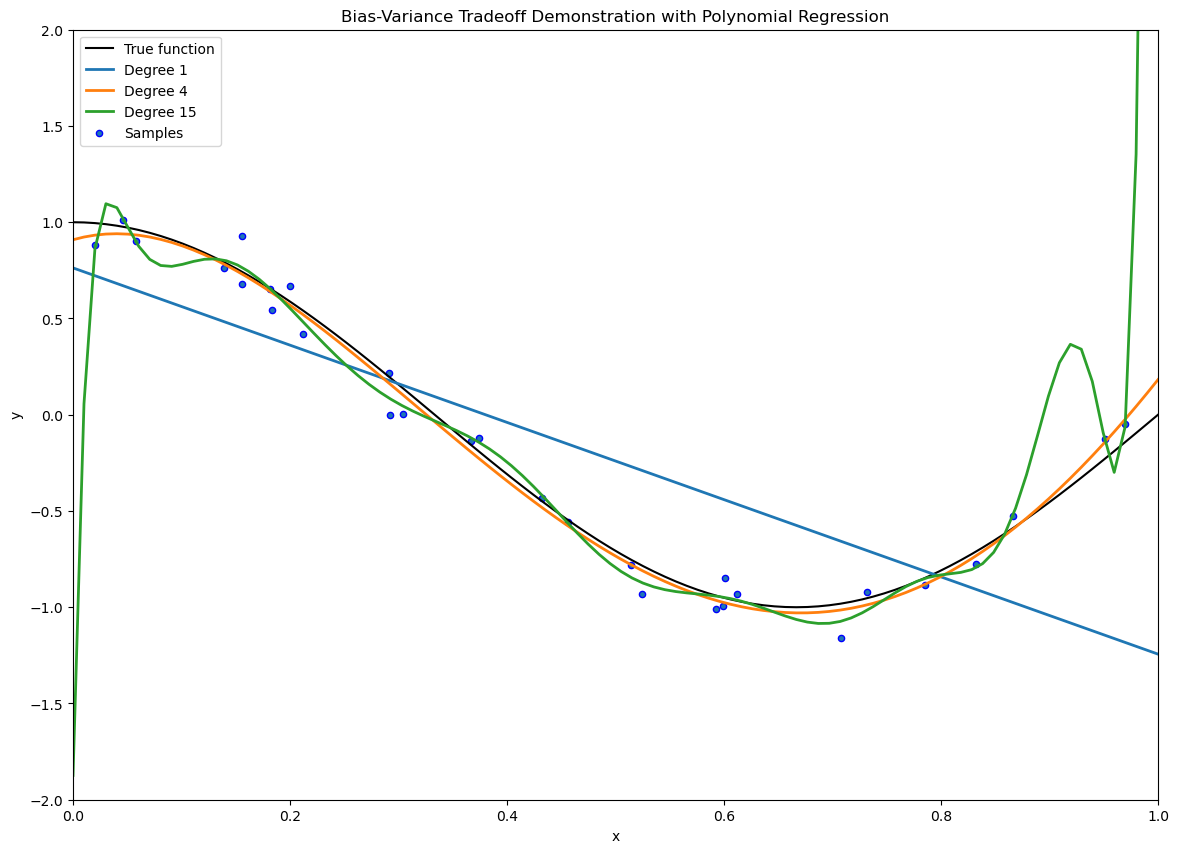

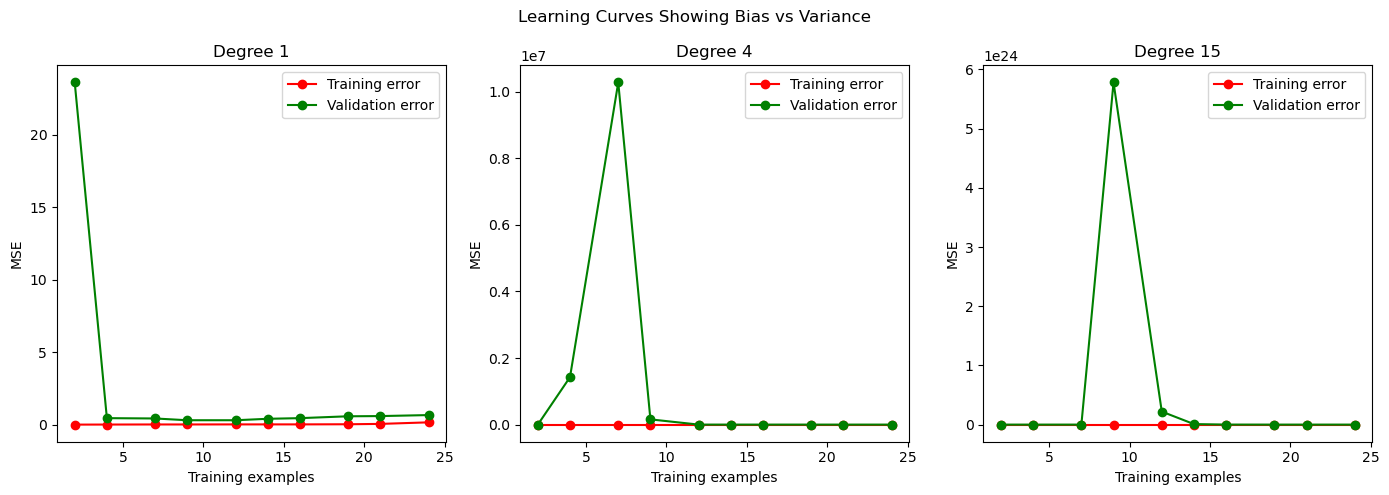

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Plotting setup
plt.figure(figsize=(14, 10))
degrees = [1, 4, 15]
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fun(X_test), label="True function", color="black")

for i, degree in enumerate(degrees):
    # Create polynomial features and fit model
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    pipeline.fit(X[:, np.newaxis], y)
    
    # Evaluate model
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plot results
    plt.plot(X_test, y_pred, linewidth=2, label=f"Degree {degree}")
    
    # Calculate and print bias-variance trade-off metrics
    train_error = mean_squared_error(y, pipeline.predict(X[:, np.newaxis]))
    test_error = mean_squared_error(true_fun(X_test), y_pred)
    print(f"Degree {degree}:")
    print(f"  Training Error (Variance): {train_error:.4f}")
    print(f"  Test Error (Bias): {test_error:.4f}")
    print(f"  Total Error: {train_error + test_error:.4f}\n")

# Plot settings
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Bias-Variance Tradeoff Demonstration with Polynomial Regression")
plt.show()

# Learning curves to further demonstrate the concept
plt.figure(figsize=(14, 5))

for i, degree in enumerate([1, 4, 15]):
    ax = plt.subplot(1, 3, i + 1)
    
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    
    # Generate learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X[:, np.newaxis], y, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring="neg_mean_squared_error")
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation error")
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.title(f"Degree {degree}")
    plt.legend(loc="best")

plt.suptitle("Learning Curves Showing Bias vs Variance")
plt.tight_layout()
plt.show()

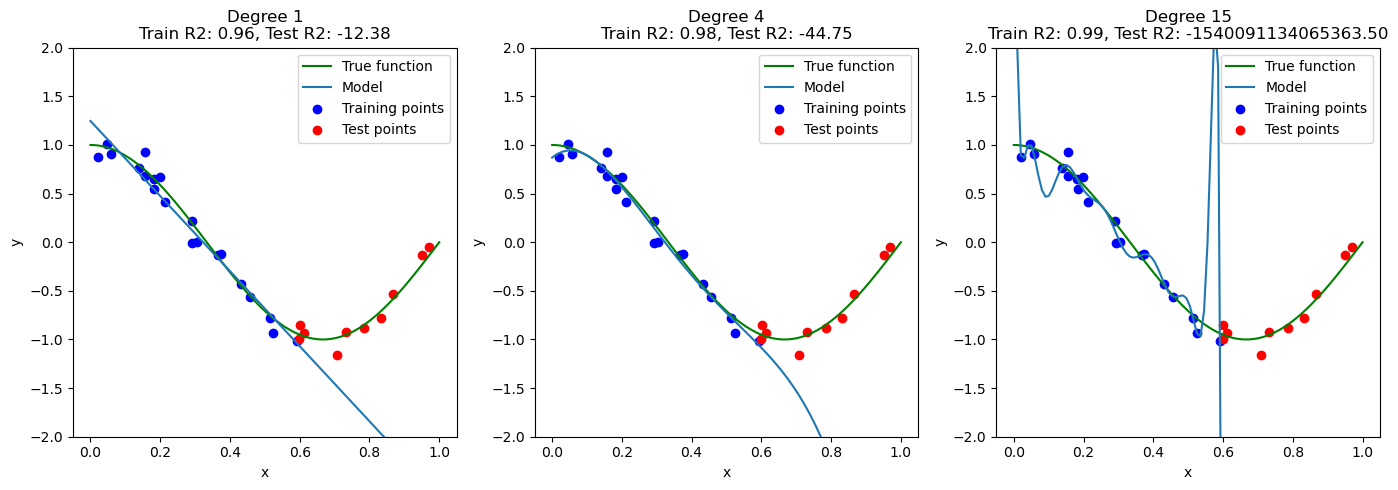

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def true_function(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(30))
y = true_function(X) + np.random.randn(30) * 0.1

# Split into training and test sets
X_train, X_test = X[:20], X[20:]
y_train, y_test = y[:20], y[20:]

# Create polynomial models of different degrees
degrees = [1, 4, 15]
plt.figure(figsize=(14, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    
    # Create polynomial features and fit model
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)
    
    # Evaluate on training and test sets
    train_score = pipeline.score(X_train[:, np.newaxis], y_train)
    test_score = pipeline.score(X_test[:, np.newaxis], y_test)
    
    # Plot results
    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, true_function(X_plot), label="True function", color='green')
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), label="Model")
    plt.scatter(X_train, y_train, label="Training points", color='blue')
    plt.scatter(X_test, y_test, label="Test points", color='red')
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim((-2, 2))
    plt.title(f"Degree {degree}\nTrain R2: {train_score:.2f}, Test R2: {test_score:.2f}")
    plt.legend(loc="best")

plt.tight_layout()
plt.show()

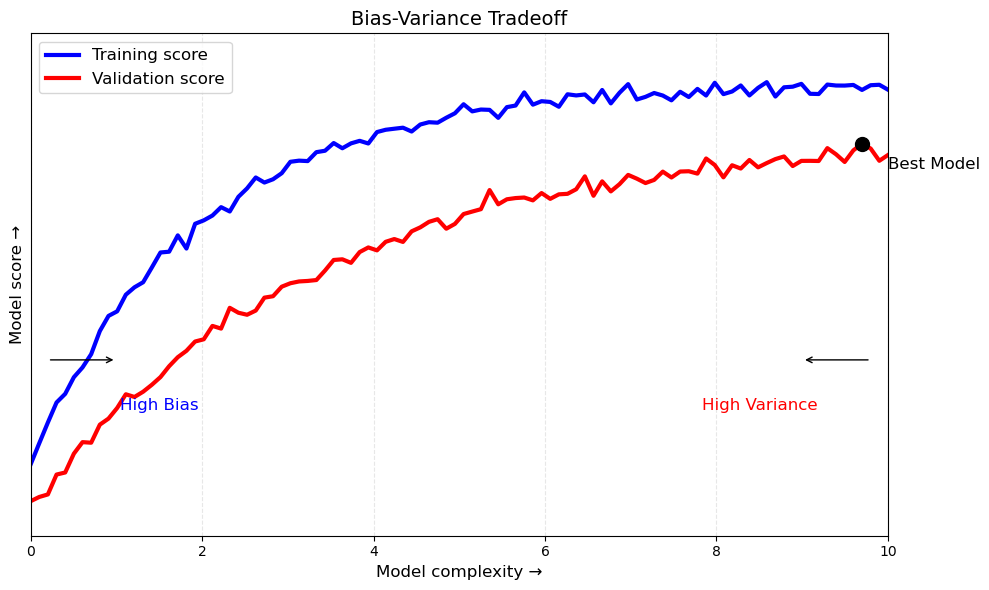

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 6))

# Create data for the curves
x = np.linspace(0, 10, 100)
training_score = 1.8 - 1.5 * np.exp(-0.5 * x) + 0.02 * np.random.normal(size=len(x))
validation_score = 1.6 - 1.5 * np.exp(-0.3 * x) + 0.02 * np.random.normal(size=len(x))

# Plot the curves
plt.plot(x, training_score, 'b-', linewidth=3, label='Training score')
plt.plot(x, validation_score, 'r-', linewidth=3, label='Validation score')

# Mark the optimal model complexity
optimal_x = x[np.argmax(validation_score)]
plt.plot(optimal_x, max(validation_score), 'ko', markersize=10)
plt.text(optimal_x + 0.3, max(validation_score) - 0.1, 'Best Model', fontsize=12)

# Add annotations
plt.text(1.5, 0.5, 'High Bias', fontsize=12, color='blue', ha='center')
plt.text(8.5, 0.5, 'High Variance', fontsize=12, color='red', ha='center')

# Add arrows
plt.annotate('', xy=(1, 0.7), xytext=(0.2, 0.7), 
             arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate('', xy=(9, 0.7), xytext=(9.8, 0.7), 
             arrowprops=dict(arrowstyle='->', color='black'))

# Formatting
plt.xlabel('Model complexity →', fontsize=12)
plt.ylabel('Model score →', fontsize=12)
plt.title('Bias-Variance Tradeoff', fontsize=14)
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper left', fontsize=12)
plt.yticks([])

plt.tight_layout()
plt.show()